<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/SOLUC_Pr%C3%A1ctica_Regresi%C3%B3n_LIneal_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal múltiple
En el siguiente enlace: https://drive.google.com/uc?id=1R0C9Kf7z1Y6ajI0abzxtFXjquTXAgACo

tenéis el dataset a utilizarse en este laboratorio (precios de casas en Boston).


## Descripción de las columnas :

- crim : per capita crime rate by town
- zn : proportion of residential land zoned for lots over 25,000 sq.ft.
- indus : proportion of non-retail business acres per town.
- chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox : nitrogen oxides concentration (parts per 10 million).
- rm : average number of rooms per dwelling.
- age : proportion of owner-occupied units built prior to 1940.
- dis : weighted mean of distances to five Boston employment centres.
- rad : index of accessibility to radial highways.
- tax : full-value property-tax rate per \$10,000.
- ptratio : pupil-teacher ratio by town.
- (b) black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat : lower status of the population (percent).
- mdev : median value of owner-occupied homes in \$1000s. (target variable)



## Laboratorio
1.- Explorar el conunto de datos para ver valores atípicos, si los hay eliminarlos, mirar si hay nulos etc.  
2.- Obtener la matriz de correlación y de ésta mirar aquellas variables que están más correlacionadas (corr >= 0.5) con nuestra variable objetivo **mdev**.  
3.- Si hay dos variables del subconjunto anterior que entre ellas estén correlacionadas escoger sólo una, aquella que esté más correlacionada con la variable objetivo.  
4.- Nos debe quedar un conjunto de datos con dos variables predictoras y la objetivo **mdev**.  
5.- Estandarizar los datos (x) de acuerdo al Score Z.  
6.- Dividir los datos en conjuntos de entrenamiento (90%)y test (10%)   
6.- Implementar la regreción lineal mediante gradiente descendente.  
7.- Comprobar que se obtienen resultados equivalentes con Scikit Learn.   

## 1.-  Lectura de datos

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pyplot as plt
import datetime
import math

In [54]:

boston_dataset = pd.read_csv("https://drive.google.com/uc?id=1R0C9Kf7z1Y6ajI0abzxtFXjquTXAgACo")


In [55]:
boston_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
boston_dataset.shape

(506, 14)

In [57]:
# Valores nulos
boston_dataset.dropna(inplace=True)

#Valores atipicos
#Q1 = boston_dataset.quantile(0.25)
#Q3 = boston_dataset.quantile(0.75)
#IQR = Q3 - Q1

#boston_dataset = boston_dataset[~((boston_dataset < (Q1 - 1.5 * IQR)) | (boston_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


## 2. Selección de Variables independientes

['rm', 'ptratio', 'lstat']


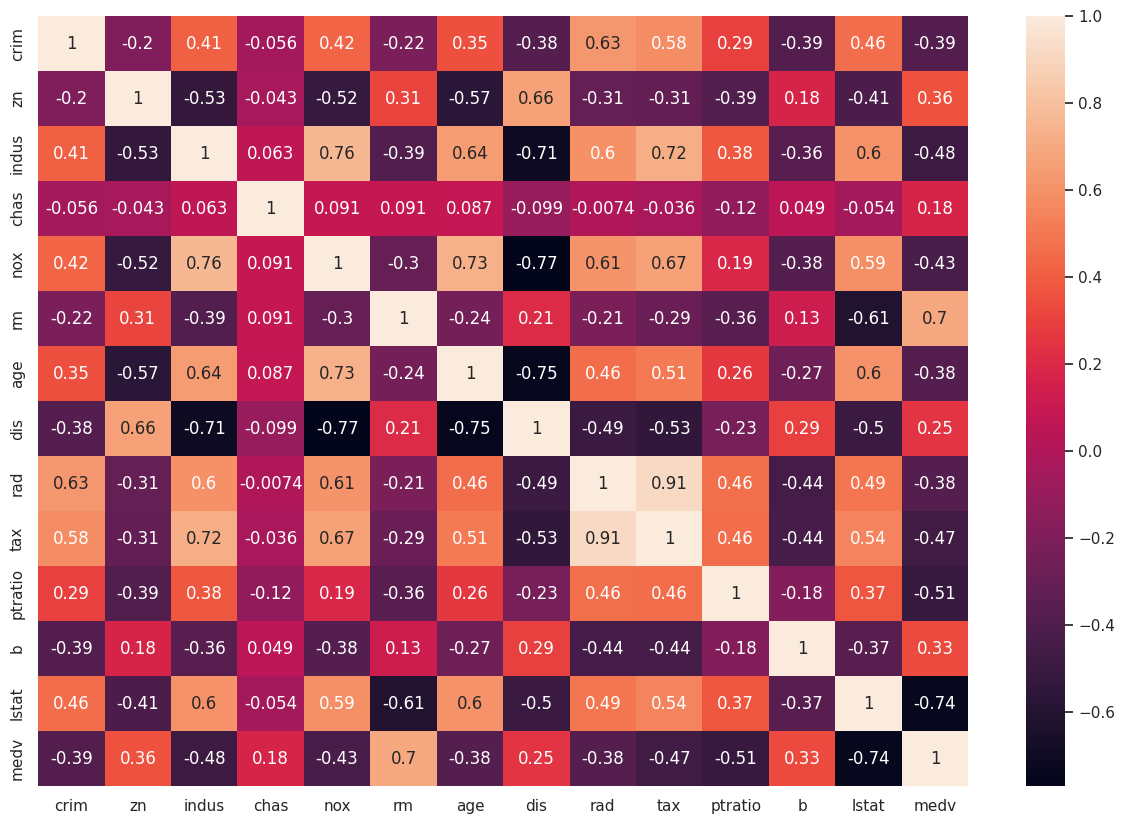

In [58]:
# Calcular la matriz de correlación
corr_matrix = boston_dataset.corr()

# Imprimir la matriz de correlación como un mapa de calor
sns.heatmap(corr_matrix, annot=True)

# Filtrar variables con coeficiente de correlación >= 0.5 con "mdev"
selected_variables = corr_matrix[abs(corr_matrix["medv"]) > 0.5].index.tolist()

# Eliminar "mdev" de las variables seleccionadas
selected_variables.remove("medv")


# Imprimir las variables seleccionadas
print(selected_variables)


In [59]:
relevant_features = abs(corr_matrix["medv"])
relevant_features = relevant_features[relevant_features > 0.5]

In [60]:
relevant_features

,medv
rm,0.695360
ptratio,0.507787
lstat,0.737663
medv,1.000000


In [64]:
selected_variables.remove("rm")


## 3. Preprocesamiento.
 (estaddarizar datos, formar la matriz X como hemos visto (con la primera columna llena de 1), escoger una parte para entrenamiento y otra para test, etc.

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Estandarizar los datos
scaler = StandardScaler()


# Crear la matriz de características X
X = boston_dataset[['ptratio', 'lstat']]
y = boston_dataset['medv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(455, 2)
(51, 2)
(455,)
(51,)


## 5. Realizar la Regresión LIneal con Sklearn.

In [82]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo LinearRegression
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = model.predict(X_test)

# Imprimir los coeficientes del modelo
print(model.intercept_)
print(model.coef_)
print("Error cuadrático medio: ", np.mean((y_pred - y_test) ** 2))
print("Coeficiente de determinación: ", model.score(X_test, y_test))

# Dibujar la recta de regresión con los datos de entrenamiento




53.66976228894775
[-1.1172155  -0.82969204]
Error cuadrático medio:  21.65212997767923
Coeficiente de determinación:  0.653200907979464


## 4. Implementar el gradiente descendente para Regresión Lineal multivariable.
Obtener el error cuadrático medio y el coeficiente de determinación.



In [67]:
# Preparamos oos datos.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: dataframe
        n: int
    Returns:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Insertamos la columna de 1's en el primer puesto.
    data.insert(0, 'Ones', 1)

    # Ya tenemos nuestros datos.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]


    # Convertimos a matrices e inicializamos theta con 0s.
    # Theta is a vector [n + 1 x 1] y su traspuesto a vector [1 x n+1],
    # n es el número de características (var. predictoras).
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

def computeCost(x, y, theta):
    """
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

def gradientDescent(x, theta, max_iter,epsilon = 10e-5):
    """

    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
        max_iter:max number of iterations in the algorithm
        epsilon: diference between two sucesive J (cost values)
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
        i: iteration at which convergence is obtained

    """
    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)


In [68]:

# Inicializamos los parámetros.
alpha = 0.001
max_iter = 1000000
epsilon = 10e-10
n = len(selected_variables)
n




2

In [69]:
# Preparamos los datos.
X1 = boston_dataset[['ptratio', 'lstat','medv']]
x, y, theta = prepareData(X1, n)

In [70]:
theta

matrix([[0.],
        [0.],
        [0.]])

In [71]:
# Ejecutamos el gradiente descendente.
theta, J_vals,i = gradientDescent(x, theta, max_iter,epsilon)


Convergencia Alcanzada ! 501210  iteraciones


Theta:  [[53.97054833]
 [-1.14101366]
 [-0.82041196]]
Error cuadrático medio:  16.603059587349556
Coeficiente de determinación:  0.8033268552533492


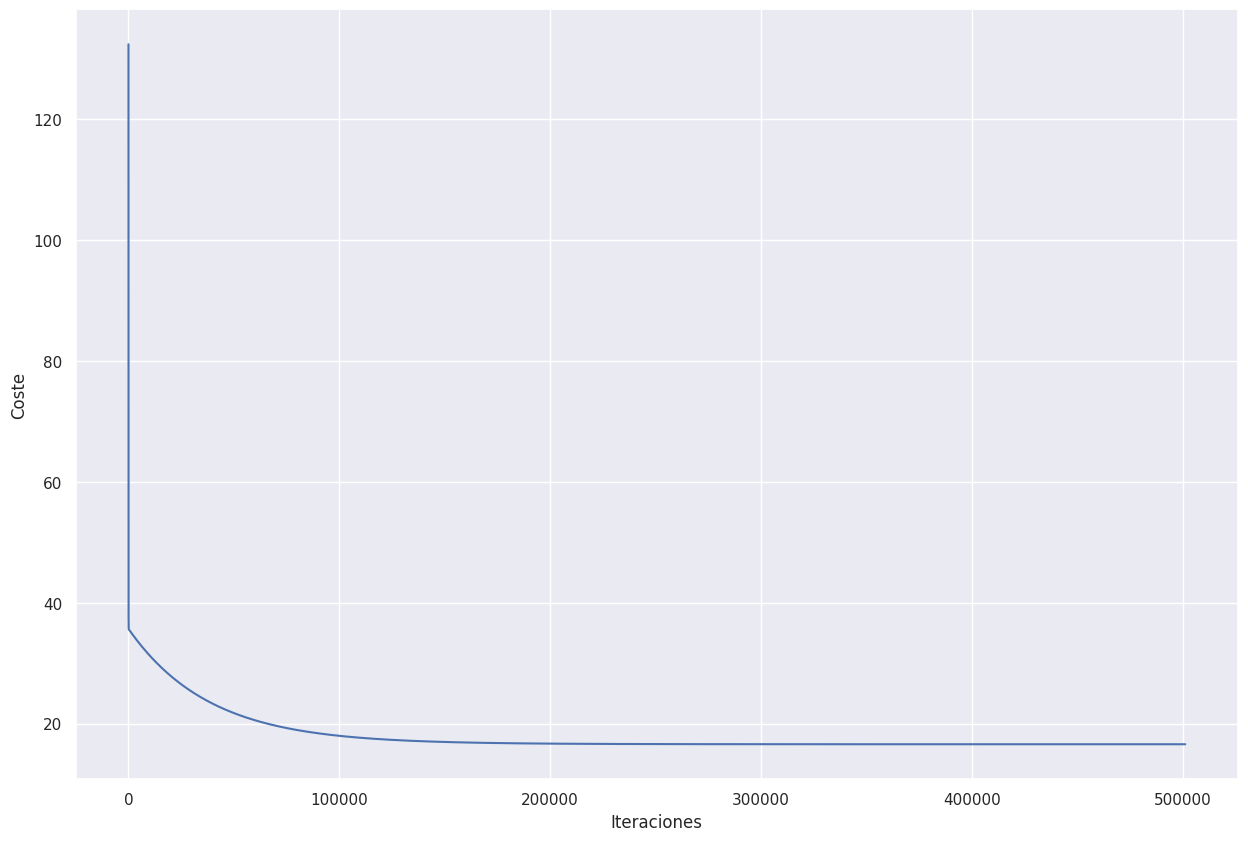

In [72]:
# Imprimimos los resultados.
print("Theta: ", theta)
print("Error cuadrático medio: ", computeCost(x, y, theta))
print("Coeficiente de determinación: ", 1 - computeCost(x, y, theta) / np.var(y))

# Graficamos el costo en función de las iteraciones.
plt.plot(J_vals)
plt.xlabel("Iteraciones")
plt.ylabel("Coste")
plt.show()

In [83]:
from numpy.linalg import inv


# Create the normal equation.
def normalEquation(x, y):
    """
    Get the analytical solution to linear regression,
    using the normal equation.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
    Returns:
        theta: a n+1 by 1 vector
    """
    theta = np.dot(np.dot(inv(np.dot(x.T, x)), x.T), y)
    return theta

In [84]:
theta1 = normalEquation(x, y)
theta1

matrix([[54.04681786, -1.1452515 , -0.82017957]])

In [75]:
computeCost(x, y, theta1)

16.603021394143664

## 6. Conclusiones,  Story Telling

**Finalmente, obtuvimos resultados comparables en términos de rendimiento en entrenamiento y  prueba con respecto a la métrica MSE Mean Square error)?.  
Los parámetros del modelo son similares ?  
 El tiempo de ejecución del algoritmo en ambas versiones es similar o no ?  
 Que se puede decir como conclusión final ?.   
 Hay alguna variable en el conjunto que a vuestro juicio sea cuestionable ?   
 Si es así, influye en el precio de una casa?  
 Preparar una página de power point para contar los resultados de vuestra práctica **